# Binary Classification
# Data Munging

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data_train= pd.read_csv("data/wisconsin_data/train_wbcd.csv")
data_test= pd.read_csv("data/wisconsin_data/test_wbcd.csv")



In [ ]:
features_data_test=data_test.iloc[:, 2:]
print(" No. of Features:", len(features_data_test.columns))

 No. of Features: 30


In [ ]:
data_test['Diagnosis'].value_counts()
#B's and M's are not balanced as the distribution is different. Number of M is only 6 which is only 30% of the data and number of B is 14 which is 70% of data.

B    14
M     6
Name: Diagnosis, dtype: int64

In [ ]:
data_train['Diagnosis'].value_counts()
#B's and M's are not balanced as the distribution are slightly different.42% of B's are in the data whereas 58% of M's are in the data.

B    58
M    42
Name: Diagnosis, dtype: int64

In [ ]:
data_train= data_train.replace(0, np.NAN)
data_train= data_train.replace('', np.NAN)
data_train.isna().sum()


Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            6
f8            6
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           6
f18           6
f19           0
f20           0
f21           2
f22           0
f23           0
f24           0
f25           0
f26           0
f27           6
f28           6
f29           0
f30           0
dtype: int64

In [ ]:
data_test= data_test.replace(0, np.NAN)
data_test= data_test.replace('', np.NAN)
missing=pd.DataFrame(data_test.isna().sum())
print("Number of missing in test data:", len(missing[missing[0]!=0]))

Number of missing in test data: 7


In [ ]:
data_train= data_train.replace(0, np.NAN)
data_train= data_train.replace('', np.NAN)
missing=pd.DataFrame(data_train.isna().sum())
print("Number of missing in train data:", len(missing[missing[0]!=0]))

Number of missing in train data: 7


In [ ]:
data_train=data_train.fillna(data_train.median())
print(data_train)

    Patient_ID Diagnosis      f1     f2      f3      f4       f5       f6  \
0       909410         B  14.020  15.66   89.59   606.5  0.07966  0.05581   
1     84358402         M  20.290  14.34  135.10  1297.0  0.10030  0.13280   
2      8912284         B  12.890  15.70   84.08   516.6  0.07818  0.09580   
3     90317302         B  10.260  12.22   65.75   321.6  0.09996  0.07542   
4       914102         B  13.160  20.54   84.06   538.7  0.07335  0.05275   
5       924342         B   9.333  21.94   59.01   264.0  0.09240  0.05605   
6      8911164         B  11.890  17.36   76.20   435.6  0.12250  0.07210   
7       893548         B  13.050  13.84   82.71   530.6  0.08352  0.03735   
8       867739         M  18.450  21.91  120.20  1075.0  0.09430  0.09709   
9       857374         B  11.940  18.24   75.71   437.6  0.08261  0.04751   
10      853201         M  17.570  15.05  115.00   955.1  0.09847  0.11570   
11      857373         B  13.640  16.34   87.21   571.8  0.07685  0.06059   

In [ ]:
data_test=data_test.fillna(data_test.median())
print(data_test)

    Patient_ID Diagnosis      f1     f2      f3      f4       f5       f6  \
0       894047         B   8.597  18.60   54.09   221.2  0.10740  0.05847   
1       892189         M  11.760  18.14   75.00   431.1  0.09968  0.05914   
2      8810528         B  11.840  18.94   75.51   428.0  0.08871  0.06900   
3       905978         B   9.405  21.70   59.60   271.2  0.10440  0.06159   
4    871001502         B   8.219  20.70   53.27   203.9  0.09405  0.13050   
5        87880         M  13.810  23.75   91.56   597.8  0.13230  0.17680   
6       882488         B   9.567  15.91   60.21   279.6  0.08464  0.04087   
7    911296202         M  27.420  26.27  186.90  2501.0  0.10840  0.19880   
8       861648         B  14.620  24.02   94.57   662.7  0.08974  0.08606   
9       895100         M  20.340  21.51  135.90  1264.0  0.11700  0.18750   
10      853612         M  11.840  18.70   77.93   440.6  0.11090  0.15160   
11     8510653         B  13.080  15.71   85.63   520.0  0.10750  0.12700   

If the data has outliers median would be the best choice because considering mean would not provide a better measure of central tendency,and that is the reason why I chose median over mean.

In [ ]:
from sklearn import preprocessing
minmaxscaler=preprocessing.MinMaxScaler()
array_train=np.array(data_train.iloc[:, 2:])
data_train.iloc[:,2:]=minmaxscaler.fit_transform(array_train)

In [ ]:
array_test=data_test.iloc[:, 2:]
data_test.iloc[:,2:]=minmaxscaler.fit_transform(array_test)

In [ ]:
data_test['Diagnosis']= data_test['Diagnosis'].replace('M', 0)
data_test['Diagnosis']= data_test['Diagnosis'].replace('B', 1)

data_test['Diagnosis']

0     1
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: Diagnosis, dtype: int64

In [ ]:
data_train['Diagnosis']= data_train['Diagnosis'].replace('M', 0)
data_train['Diagnosis']= data_train['Diagnosis'].replace('B', 1)

data_train['Diagnosis']

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    1
21    1
22    0
23    0
24    1
25    1
26    1
27    0
28    1
29    1
     ..
70    1
71    1
72    0
73    1
74    0
75    0
76    1
77    1
78    1
79    0
80    0
81    1
82    1
83    0
84    1
85    0
86    1
87    0
88    0
89    0
90    0
91    0
92    1
93    0
94    0
95    0
96    0
97    1
98    1
99    1
Name: Diagnosis, Length: 100, dtype: int64

In [ ]:
predictors = ['f1', 'f2','f3','f4', 'f5', 'f6', 'f7','f8','f9', 'f10', 'f11', 'f12','f13','f14', 'f15', 'f16', 'f17','f18','f19', 'f20', 'f21', 'f22','f23','f24', 'f25', 'f26', 'f27','f28','f29', 'f30']
response = ['Diagnosis']
print(data_train[predictors])

          f1        f2        f3        f4        f5        f6        f7  \
0   0.359671  0.223557  0.336869  0.251707  0.169829  0.112411  0.042753   
1   0.718141  0.162587  0.705311  0.658074  0.493492  0.379775  0.460866   
2   0.295066  0.225404  0.292260  0.198799  0.146621  0.251285  0.256684   
3   0.144703  0.064665  0.143863  0.084040  0.488161  0.180511  0.038882   
4   0.310503  0.448961  0.292098  0.211806  0.070880  0.101785  0.035978   
5   0.091704  0.513626  0.089297  0.050141  0.369610  0.113245  0.087815   
6   0.237894  0.302079  0.228465  0.151130  0.841618  0.168982  0.133443   
7   0.304214  0.139492  0.281169  0.207039  0.230359  0.048305  0.004251   
8   0.612944  0.512240  0.584683  0.527425  0.399404  0.255765  0.265654   
9   0.240752  0.342725  0.224498  0.152307  0.216089  0.083588  0.040039   
10  0.562632  0.195381  0.542584  0.456862  0.464795  0.320392  0.226588   
11  0.337945  0.254965  0.317600  0.231285  0.125764  0.129011  0.037324   
12  0.349951

#  Logistic Regression 

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(data_train[predictors], data_train['Diagnosis'])
y_predict = lr.predict(data_test[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, data_test['Diagnosis'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))


Model Accuracy is: 0.95
Model Coeff: [ 7.25821413 -0.57071254 -1.59675227 -0.7073427  -1.13357305 -0.24676961
 -0.57854985 -1.91187289 -2.4210991  -0.01399259  1.89987611 -0.82495074
  1.06817933 -1.01804489 -1.51635977  1.05407205  0.75406307  0.84382813
  0.76007611  1.62095715  0.56682818 -1.62866712 -3.19431076 -1.75867884
 -1.81576167 -0.94735976 -1.39030257 -1.53231015 -1.91484531 -1.4580444
 -1.34982096]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

alpha_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/alpha_val, penalty='l1')
lr.fit(data_train[predictors], data_train['Diagnosis'])
y_predict = lr.predict(data_test[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, data_test['Diagnosis'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))


Model Accuracy is: 0.9
Model Coeff: [ 16.20876256   0.           0.           0.           0.
   0.           0.           0.          -2.79733444   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -6.99014716  -9.76388191 -17.20534378   0.
  -4.81428218   0.           0.          -0.15492962   0.
  -3.32732534]


In [ ]:
from sklearn.metrics import classification_report
y_true = data_test['Diagnosis']
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.88      1.00      0.93        14

   micro avg       0.90      0.90      0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data_test['Diagnosis'],y_predict)

array([[ 4,  2],
       [ 0, 14]], dtype=int64)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict = lr.predict(Dtest[predictors])
      model_acc += f1_score(y_predict, Dtest[label])
      

   model_acc /= trials
   

   return np.round(model_acc, decimals=2)

In [ ]:


alpha_vals = [0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]
l1_acc = np.zeros(len(alpha_vals))
index = 0
#L2 regularization
for l in alpha_vals:
   l1_acc[index] = runLRmodel(10,data_train, predictors, 'Diagnosis', 'l1', np.float(l))
   index += 1

print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

Acc: [0.99 0.96 0.9  0.   0.   0.   0.   0.   0.   0.   0.  ]
Best Alpha: 0.1


# 1.3B Task

In [ ]:


lambda_vals = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]
l2_acc = np.zeros(len(lambda_vals))
index = 0
#L2 regularization
for l in lambda_vals:
   l2_acc[index] = runLRmodel(10,data_train, predictors, 'Diagnosis', 'l2', np.float(l))
   index += 1

print("Acc: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

Acc: [0.98 0.99 0.99 0.98 0.98 0.96 0.95 0.95 0.92 0.88]
Best Lambda: 0.003


# 

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lambda_val = 0.003
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(data_train[predictors], data_train['Diagnosis'])
y_predict = lr.predict(data_test[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, data_test['Diagnosis'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))



Model Accuracy is: 0.95
Model Coeff: [ 19.94503261  -1.89938266  -3.56778988  -2.32063607  -3.7957463
   1.57110675  -0.02840747  -5.68851017  -6.96448269  -0.78450117
   7.4900836   -1.67388226   2.77520743  -2.93111023  -3.75571881
  -1.95451347   2.08803674   2.61324884   2.30208323   5.370148
  -1.33729949  -4.47516756 -10.41121119  -4.97823307  -5.30924984
  -4.3073315   -2.10355215  -1.18474514  -2.38005483  -4.36795951
  -5.89786837]


In [ ]:
features1=pd.DataFrame(lr.coef_.transpose(),columns= [""])
sort=features1.sort_values(by="", ascending=False)
print("The top 5 features lamda:", sort.head())

The top 5 features lamda:             
9   7.490084
18  5.370148
11  2.775207
16  2.613249
17  2.302083


In [ ]:
from sklearn.metrics import classification_report
y_true = data_test['Diagnosis']
print(classification_report(y_true, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
alpha_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/alpha_val, penalty='l1')
lr.fit(data_train[predictors], data_train['Diagnosis'])
y_predict = lr.predict(data_test[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, data_test['Diagnosis'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))


Model Accuracy is: 0.9
Model Coeff: [ 16.22443839   0.           0.           0.           0.
   0.           0.           0.          -2.82538694   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -7.5897989   -9.76581918 -16.58124943   0.
  -4.81282941   0.           0.          -0.18348465   0.
  -3.34246062]


In [ ]:
#The top 5 features selected in decreasing order of feature weights
features=pd.DataFrame(lr.coef_.transpose(),columns= [""])
sort=features.sort_values(by="", ascending=False)
print("The top 5 features alpha:", sort.head())


The top 5 features alpha:        
0   0.0
13  0.0
28  0.0
26  0.0
25  0.0


In [ ]:
from sklearn.metrics import classification_report
y_true = data_test['Diagnosis']
print(classification_report(y_true, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.88      1.00      0.93        14

   micro avg       0.90      0.90      0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data_test['Diagnosis'],y_predict)

array([[ 4,  2],
       [ 0, 14]], dtype=int64)

# Multi Class Classification

In [ ]:

data_mnist= pd.read_csv("data/mnist/reduced_mnist.csv")
data_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_points= len(data_mnist)
print(" Number of data_points:", data_points)
number_f= len(data_mnist.iloc[:, 1:].columns)
print("Number of feature:", number_f )
unique_l= np.unique(data_mnist['label'].values)
print("Unique Labels:", unique_l )

 Number of data_points: 2520
Number of feature: 784
Unique Labels: [0 1 2 3 4 5 6 7 8 9]


# 

In [ ]:


from sklearn.model_selection import train_test_split

Mtrain,Mtest = train_test_split(data_mnist, test_size=0.3)

print(Mtrain.shape)
print(Mtest.shape)

(1764, 785)
(756, 785)


In [ ]:
alpha_val = 1
multi_lr = LogisticRegression(C=1/alpha_val, penalty='l1', multi_class='ovr')
multi_lr.fit(Mtrain.iloc[:,1:],Mtrain['label'])
y_predict =multi_lr .predict(Mtest.iloc[:,1:])

#Evaluate our model
model_acc = accuracy_score(y_predict, Mtest['label'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Accuracy is: 0.8386243386243386
Model Coeff: [ 16.22443839   0.           0.           0.           0.
   0.           0.           0.          -2.82538694   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -7.5897989   -9.76581918 -16.58124943   0.
  -4.81282941   0.           0.          -0.18348465   0.
  -3.34246062]


In [ ]:
from sklearn.metrics import classification_report
y_true = Mtest['label']
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        68
           1       0.88      0.97      0.92        72
           2       0.88      0.78      0.83        86
           3       0.87      0.86      0.86        78
           4       0.78      0.82      0.80        72
           5       0.89      0.76      0.82        75
           6       0.89      0.88      0.89        66
           7       0.91      0.87      0.89        83
           8       0.68      0.73      0.70        85
           9       0.82      0.82      0.82        71

   micro avg       0.84      0.84      0.84       756
   macro avg       0.84      0.84      0.84       756
weighted avg       0.84      0.84      0.84       756



# 

In [ ]:
predictors= data_mnist.iloc[:, 1:].columns
predictors

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [ ]:
from sklearn.metrics import f1_score
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_acc_train=0

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score,multi_class='ovr', penalty=penalty_type)
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict = lr.predict(Dtest[predictors])
      model_acc += f1_score(y_predict, Dtest[label],average='macro')
      y_predtrain=lr.predict(Dtrain[predictors])
      model_acc_train+=f1_score(y_predtrain,Dtrain[label],average='macro')
      

   model_acc /= trials
   model_acc_train/=trials
   

   return np.round(model_acc, decimals=2),np.round(model_acc_train,decimals=2)

In [ ]:
alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]
l1_acc = np.zeros(len(alpha_vals))
l1_acc2=np.zeros(len(alpha_vals))
index = 0
#L2 regularization
for l in alpha_vals:
   l1_acc[index],l1_acc2[index] = runLRmodel(10,Mtrain, predictors, 'label', 'l1', np.float(l))
   index += 1

print("Validation Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Validation Alpha: {}".format(best_alpha))



Validation Acc: [0.83 0.83 0.84 0.83 0.84 0.84 0.86 0.86 0.79 0.7  0.5 ]
Best Validation Alpha: 333


In [ ]:
print("Training Acc: {}".format(l1_acc2))
# penalty at which validation accuracy is maximum
max_index_2  = np.argmax(l1_acc2)
best_alpha = alpha_vals[max_index_2]
print("Best Training Alpha: {}".format(best_alpha))

Training Acc: [1.   1.   1.   1.   1.   1.   0.97 0.92 0.85 0.73 0.52]
Best Training Alpha: 0.1


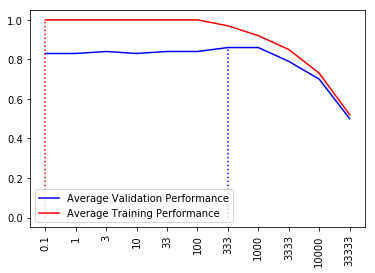

In [ ]:
plt.plot(range(0,len(alpha_vals)), l1_acc, color='b', label='Average Validation Performance')
plt.plot(range(0,len(alpha_vals)), l1_acc2, color='r', label='Average Training Performance')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='b')
plt.plot((max_index_2, max_index_2), (0, l1_acc2[max_index_2]), ls='dotted', color='r')
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical') 

plt.legend(loc="lower left")
plt.show()

As we look at the graph, the average training performance is higher than the Average validation performance. This is clear indication of overfitting of the model. Model is over fit for lower value of alpha and model is underfit for higher value of alpha. Average validation performance is highest at alpha value of 333 and that is the reason we choose the alpha value as 333.

# 

In [ ]:
alpha_val = 333
multi_lr = LogisticRegression(C=1/alpha_val, penalty='l1', multi_class='ovr')
multi_lr.fit(Mtrain.iloc[:,1:],Mtrain['label'])
y_predict =multi_lr .predict(Mtest.iloc[:,1:])

#Evaluate our model
model_acc = accuracy_score(y_predict, Mtest['label'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Accuracy is: 0.8650793650793651
Model Coeff: [ 16.22443839   0.           0.           0.           0.
   0.           0.           0.          -2.82538694   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -7.5897989   -9.76581918 -16.58124943   0.
  -4.81282941   0.           0.          -0.18348465   0.
  -3.34246062]


In [ ]:
from sklearn.metrics import classification_report
y_true = Mtest['label']
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        68
           1       0.86      0.97      0.92        72
           2       0.94      0.84      0.88        86
           3       0.90      0.85      0.87        78
           4       0.81      0.85      0.83        72
           5       0.90      0.80      0.85        75
           6       0.87      0.92      0.90        66
           7       0.94      0.89      0.91        83
           8       0.77      0.81      0.79        85
           9       0.77      0.80      0.79        71

   micro avg       0.87      0.87      0.87       756
   macro avg       0.87      0.87      0.87       756
weighted avg       0.87      0.87      0.87       756



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Mtest['label'],y_predict)

array([[64,  0,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0, 70,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  2, 72,  0,  2,  1,  3,  2,  3,  1],
       [ 0,  1,  3, 66,  0,  3,  0,  0,  2,  3],
       [ 0,  0,  0,  1, 61,  1,  1,  0,  3,  5],
       [ 1,  0,  1,  4,  0, 60,  3,  0,  3,  3],
       [ 2,  0,  0,  0,  2,  0, 61,  0,  1,  0],
       [ 0,  2,  1,  0,  1,  0,  0, 74,  2,  3],
       [ 1,  6,  0,  0,  2,  2,  1,  2, 69,  2],
       [ 2,  0,  0,  2,  7,  0,  0,  1,  2, 57]], dtype=int64)

The model shows signs of overfitting as we can see that the accuracy scores for the test data is lower than that of training data.